# BE - Programmmation avec Contraintes
Baptiste REMY & Corentin TRIBOULET 

In [2]:
import pulp, numpy as np, matplotlib.pyplot as plt

### Monnaie - 1pts

In [3]:
# Données du problème
M = 28  # Montant cible
S = [1, 7, 23]  # Liste des pièces disponibles

# Création du problème de minimisation
problem = pulp.LpProblem("Minimisation_du_nombre_de_pieces", pulp.LpMinimize)

# Variables de décision : nombre de pièces de chaque type
E = [pulp.LpVariable(f"E_{i}", lowBound=0, cat='Integer') for i in range(len(S))]

# Fonction objectif : minimiser le nombre total de pièces utilisées
problem += pulp.lpSum(E), "Nombre_total_de_pieces"

# Contrainte : atteindre le montant cible M
problem += pulp.lpSum(E[i] * S[i] for i in range(len(S))) == M, "Atteindre_le_montant_M"

# Résolution du problème
problem.solve(pulp.PULP_CBC_CMD(msg=False))

# Affichage des résultats
print("Statut de la solution :", pulp.LpStatus[problem.status], "\n")
print("Solution optimale :")
for i in range(len(S)):
    print(f"Nombre de pièces de {S[i]} : {int(E[i].varValue)}")
print("Nombre total de pièces utilisées :", int(pulp.value(problem.objective)))

Statut de la solution : Optimal 

Solution optimale :
Nombre de pièces de 1 : 0
Nombre de pièces de 7 : 4
Nombre de pièces de 23 : 0
Nombre total de pièces utilisées : 4


### Decoupe papier - 2 pts

In [ ]:
# Données du problème
longueur = 300 
commande = np.array([[ 97,135],
                     [610,108],
                     [395, 93],
                     [211, 42]
                     ])
max_decoupes= sum(commande[:,1:2])

# Dénombrement des méthodes de découpes
methodes= np.array([[1,0,0,0], # 1 fois 135cm 
                    [2,0,0,0],
                    [0,1,0,0],
                    [0,2,0,0],
                    [0,0,1,0],
                    [0,0,2,0],
                    [0,0,3,0],
                    [0,0,0,1],
                    [0,0,0,2],
                    [0,0,0,3],
                    [0,0,0,4],
                    [0,0,0,5],
                    [0,0,0,6],
                    [0,0,0,7],
                    [1,1,0,0],
                    [1,1,0,1],
                    [1,0,1,0],
                    [1,0,1,1],
                    [1,0,0,1],
                    [1,0,0,2],
                    [1,0,0,3],
                    [0,1,1,0],
                    [0,1,2,0],
                    [0,1,0,1],
                    [0,1,0,2],
                    [0,1,0,3],
                    [0,1,0,4],
                    [0,2,0,1],
                    [0,2,0,2],
                    [0,1,1,1],
                    [0,1,1,2],
                    [0,0,1,1],
                    [0,0,1,2],
                    [0,0,1,3],
                    [0,0,1,4],
                    [0,0,1,4],
                    [0,0,2,1],
                    [0,0,2,2],
                    ])

# Création du problème de minimisation
problem = pulp.LpProblem("Minimisation_rouleaux", pulp.LpMinimize)

# Variables de décision : nombre de découpes par type de découpe
Type_decoupe = [pulp.LpVariable(f"nb_decoupe{i}",lowBound=0,  cat='Integer') for i in range(len(methodes))]

# Fonction objectif : minimiser le nombre de découpe
problem += pulp.lpSum(Type_decoupe), "minimiser_le_nombre_de_découpe"

# Contrainte : la somme des decoupes doit valoir l'objectif de découpes 
problem += pulp.lpSum(Type_decoupe[i]*methodes[i,0] for i in range(len(methodes))) == commande[0,0]
problem += pulp.lpSum(Type_decoupe[i]*methodes[i,1] for i in range(len(methodes))) == commande[1,0]
problem += pulp.lpSum(Type_decoupe[i]*methodes[i,2] for i in range(len(methodes))) == commande[2,0]
problem += pulp.lpSum(Type_decoupe[i]*methodes[i,3] for i in range(len(methodes))) == commande[3,0]
# Résolution du problème
problem.solve(pulp.PULP_CBC_CMD(msg=False))

# Affichage des résultats
print("Statut de la solution :", pulp.LpStatus[problem.status])
print("")
print(f"Il faudra {int(sum(Type_decoupe[i].varValue for i in range(len(Type_decoupe))))} rouleaux")
print("")
print("Solution optimale :")
for i in range(len(methodes)):
    if int(Type_decoupe[i].varValue) != 0:
        parts = [f"{dim}x{int(methodes[i, j])}" for j, dim in enumerate(commande[:, 1]) if methodes[i, j] != 0]
        details = " ".join(parts)
        print(f"La méthode {i} a été utilisée {int(Type_decoupe[i].varValue)} fois ({details})")

Statut de la solution : Optimal

Il faudra 453 rouleaux

Solution optimale :
La méthode 1 a été utilisée 48 fois (135x2)
La méthode 3 a été utilisée 100 fois (108x2)
La méthode 4 a été utilisée 1 fois (93x1)
La méthode 14 a été utilisée 1 fois (135x1 108x1)
La méthode 22 a été utilisée 197 fois (108x1 93x2)
La méthode 27 a été utilisée 1 fois (108x2 42x1)
La méthode 28 a été utilisée 105 fois (108x2 42x2)


### Voyage - 2 pts

In [5]:
# Données du problème
villes = ["Lyon", "St-Etienne", "Valence", "Grenoble"]
n = len(villes)
distances = np.array([
    [0, 26, 34, 78],
    [26, 0, 18, 52],
    [34, 18, 0, 51],
    [78, 52, 51, 0]
])

# Création du problème de minimisation
problem = pulp.LpProblem("TSP", pulp.LpMinimize)

# Variables de décision : x[i][j] = 1 si on va de ville i à ville j, 0 sinon
x = pulp.LpVariable.dicts('x', (range(n), range(n)), cat='Binary')

# Fonction objectif : minimiser la distance totale
problem += pulp.lpSum(distances[i][j] * x[i][j] for i in range(n) for j in range(n) if i != j)

# Contraintes :

# Chaque ville doit être visitée exactement une fois
for i in range(n):
    problem += pulp.lpSum(x[i][j] for j in range(n) if i != j) == 1  

for j in range(n):
    problem += pulp.lpSum(x[i][j] for i in range(n) if i != j) == 1  


# Il ne peut y avoir de sous-circuit 
u = pulp.LpVariable.dicts('u', range(n), lowBound=0, upBound=n-1, cat='Continuous') # ordre d'apparition des villes

for i in range(1, n):  # éviter les sous-circuits pour les villes autres que Lyon
    for j in range(1, n):
        if i != j:
            problem += u[i] - u[j] + n * x[i][j] <= n - 1

# Résolution du problème
problem.solve(pulp.PULP_CBC_CMD(msg=False))

# Affichage des résultats
print("Statut de la solution :", pulp.LpStatus[problem.status], "\n")
print("Solution optimale trouvée :")
chemin = []
distance_totale = 0
ville_courante = 0  # Partir de Lyon (index 0)
ordre_villes = [villes[ville_courante]]

while len(ordre_villes) < n:
    for j in range(n):
        if pulp.value(x[ville_courante][j]) == 1:  
            ordre_villes.append(villes[j])
            ville_courante = j
            break

# Ajouter Lyon à la fin pour revenir au point de départ
ordre_villes.append(villes[0])

# Calculer la distance totale
for i in range(n):
    for j in range(n):
        if pulp.value(x[i][j]) == 1:
            distance_totale += distances[i][j]

# Affichage du chemin dans le format souhaité
print("Chemin :", " - ".join(ordre_villes))
print("Distance totale :", distance_totale, "km")

Statut de la solution : Optimal 

Solution optimale trouvée :
Chemin : Lyon - St-Etienne - Grenoble - Valence - Lyon
Distance totale : 163 km


### Gâteaux - 3 pts

In [6]:
# Données du problème
recettes = np.array([[0.25,  2,      0.075, 0.1,    0    ], #Tarte a la banane
                     [0.2,   0,      0.15,  0.15,   0.075]]) # Tarte au chocolat
                   # farine, banane, sucre, beurre, cacao
produits=['farine', 'banane', 'sucre', 'beurre', 'cacao']
quantité_produit= np.array([4,    6,      2,     0.5,    0.5])
                        # farine, banane, sucre, beurre, cacao
prix = np.array([4, 4.5])#Tarte a la banane, Tarte au chocolat

# Création du problème de maximisation
problem = pulp.LpProblem("Maximisation_bénéfice_patissier", pulp.LpMaximize)

# Variables de décision : nombre de recettes
Nb_recette = [pulp.LpVariable(f"recette_{i}", lowBound=0, cat='Integer') for i in range(len(prix))]

# Fonction objectif : maximiser le bénéfice
problem += pulp.lpSum(Nb_recette[i]*prix[i] for i in range(len(prix))), "Maximiser_le_bénéfice"

# Contrainte : quantité de produits
problem += pulp.lpSum(Nb_recette[i]*recettes[i,0] for i in range(len(prix))) <= quantité_produit[0] #farine
problem += pulp.lpSum(Nb_recette[i]*recettes[i,1] for i in range(len(prix))) <= quantité_produit[1] #banane
problem += pulp.lpSum(Nb_recette[i]*recettes[i,2] for i in range(len(prix))) <= quantité_produit[2] #sucre
problem += pulp.lpSum(Nb_recette[i]*recettes[i,3] for i in range(len(prix))) <= quantité_produit[3] #beurre
problem += pulp.lpSum(Nb_recette[i]*recettes[i,4] for i in range(len(prix))) <= quantité_produit[4] #cacao

# Résolution du problème
problem.solve(pulp.PULP_CBC_CMD(msg=False))

# Affichage des résultats
print("Statut de la solution :", pulp.LpStatus[problem.status],"\n")
print("Solution optimale :")
print(f"Le pâtissier fera x{Nb_recette[0].varValue} tartes à la banane et x{Nb_recette[1].varValue} tarte au chocolat")
print("Bénéfice :", int(pulp.value(problem.objective)), "euros \n")
print("Quantités utilisées:")
texte_produit=['kg de farine', 'bananes', 'kg de sucre', 'kg de beurre', 'kg de cacao']
for i,p in enumerate(texte_produit):
    print(f"{round((Nb_recette[0].varValue*recettes[0,i]+ Nb_recette[1].varValue*recettes[1,i])*20)/20} {texte_produit[i]} sur {quantité_produit[i]} {texte_produit[i]}")

Statut de la solution : Optimal 

Solution optimale :
Le pâtissier fera x2.0 tartes à la banane et x2.0 tarte au chocolat
Bénéfice : 17 euros 

Quantités utilisées:
0.9 kg de farine sur 4.0 kg de farine
4.0 bananes sur 6.0 bananes
0.45 kg de sucre sur 2.0 kg de sucre
0.5 kg de beurre sur 0.5 kg de beurre
0.15 kg de cacao sur 0.5 kg de cacao


### Voyageur - 3 pts

In [8]:
# Données du problème
objets = np.array([[5,8],[7,11],[4,6],[3,4]]) # poids,bénéfice

# Création du problème de minimisation
problem = pulp.LpProblem("Maximisation_bénéfice_voyageur", pulp.LpMaximize)

# Variables de décision : prendre l'objet ou pas
Obj = [pulp.LpVariable(f"objet_{i}", lowBound=0, upBound=1, cat='Integer') for i in range(len(objets))]

# Fonction objectif : maximiser le bénéfice
problem += pulp.lpSum(objets[i,1:2]*Obj[i] for i in range(len(objets))), "Maximiser_le_bénéfice"

# Contrainte : maximum 14kg
problem += pulp.lpSum(objets[i,0:1]*Obj[i] for i in range(len(objets))) <= 14

# Résolution du problème
problem.solve(pulp.PULP_CBC_CMD(msg=False))

# Affichage des résultats
print("Statut de la solution :", pulp.LpStatus[problem.status],"\n")
print("Solution optimale :")
for i in range(len(objets)):
    if int(Obj[i].varValue) == 0:
        print(f"L'objet {i+1} est pris? : non")
    else:
        print(f"L'objet {i+1} est pris? : oui")
print("Bénéfice :", int(pulp.value(problem.objective)), "euros")


Statut de la solution : Optimal 

Solution optimale :
L'objet 1 est pris? : non
L'objet 2 est pris? : oui
L'objet 3 est pris? : oui
L'objet 4 est pris? : oui
Bénéfice : 21 euros


### Sur les docks - 5 pts 
Sans prendre en compte la contrainte : 8 ouvriers

Statut de la solution : Optimal
Temps total minimum (makespan) : 75.0


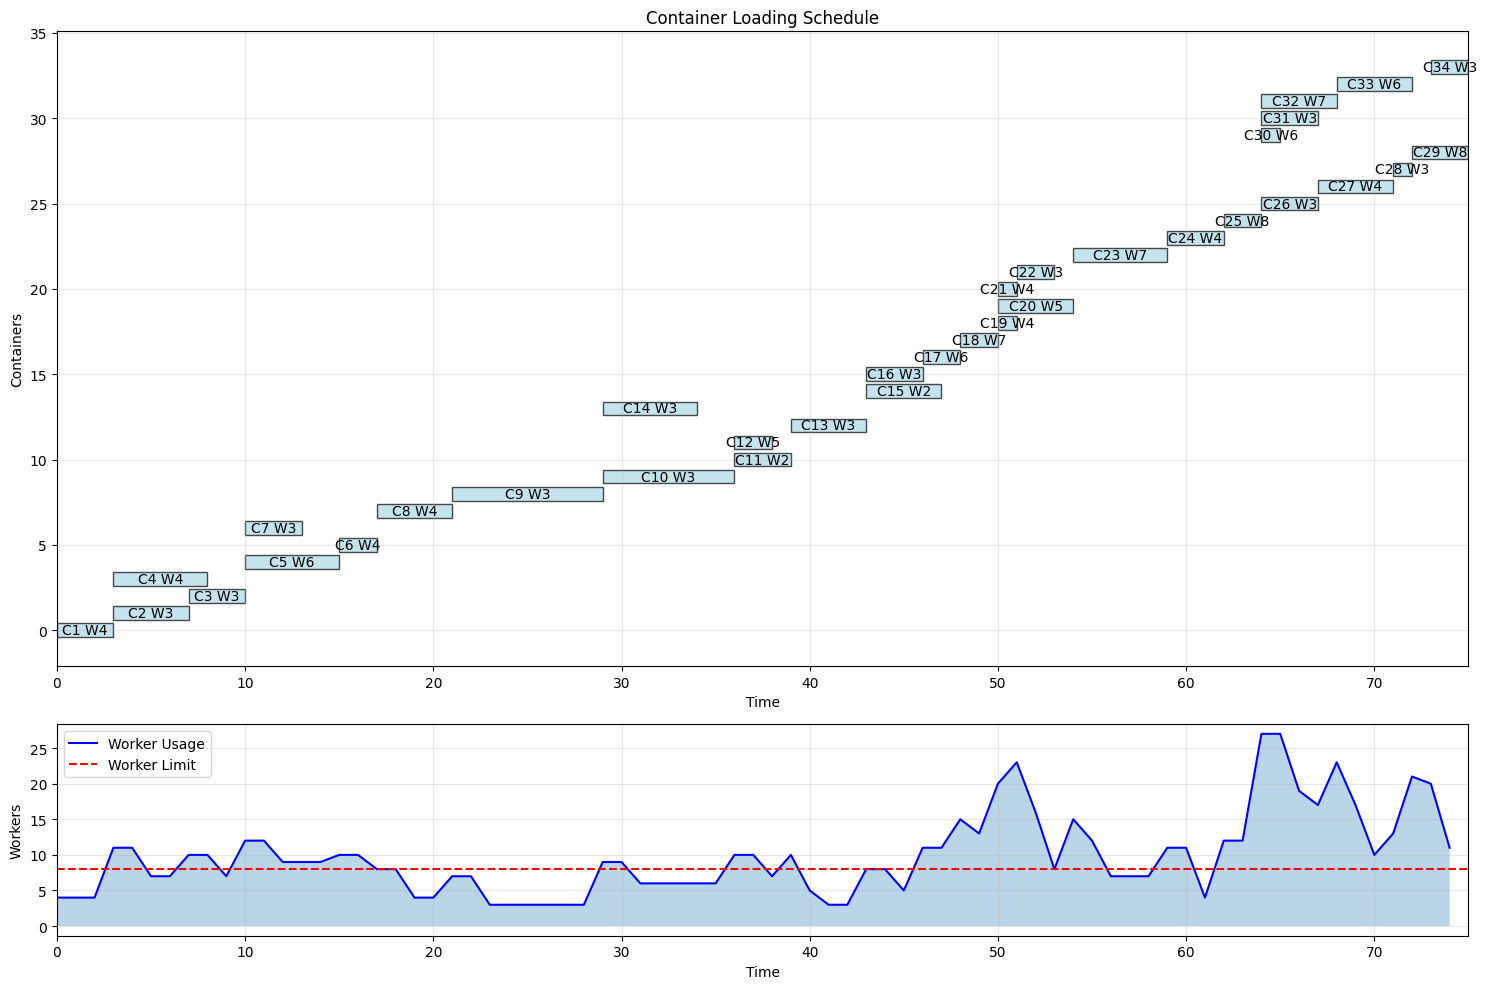

In [3]:
# Données sous forme de tableau numpy : [Container, Durée, Nb Ouvriers]
data = np.array([
    [1, 3, 4], [2, 4, 3], [3, 3, 3], [4, 5, 4], [5, 5, 6],
    [6, 2, 4], [7, 3, 3], [8, 4, 4], [9, 8, 3], [10, 7, 3],
    [11, 3, 2], [12, 2, 5], [13, 4, 3], [14, 5, 3], [15, 4, 2],
    [16, 3, 3], [17, 2, 6], [18, 2, 7], [19, 1, 4], [20, 4, 5],
    [21, 1, 4], [22, 2, 3], [23, 5, 7], [24, 3, 4], [25, 2, 8],
    [26, 3, 3], [27, 4, 4], [28, 1, 3], [29, 3, 8], [30, 1, 6],
    [31, 3, 3], [32, 4, 7], [33, 4, 6], [34, 2, 3]
])

# Création du problème de minimisation
problem = pulp.LpProblem("Minimisation_temps_chargement_container", pulp.LpMinimize)

# Nombre de containers
n_containers = len(data)
max_workers = 8

# Variables de décision : temps de début pour chaque container
start_times = [pulp.LpVariable(f"start_{i}", lowBound=0, cat='Continuous') for i in range(n_containers)]

# Variable pour le makespan (temps total nécessaire)
makespan = pulp.LpVariable("makespan", lowBound=0, cat='Continuous')

# Fonction objectif : minimiser le makespan
problem += makespan, "Minimiser_le_temps_total"

### Contraintes
# Contraintes de durée pour chaque container et contrainte sur le makespan
for i in range(n_containers):
    container_id, duree, ouvriers = data[i]
    # Contrainte pour que chaque tâche se termine avant le makespan
    problem += start_times[i] + duree <= makespan, f"Fin_conteneur_{container_id}"


# Contraintes de précédence
precedences = [
    (1, [2, 4]),
    (2, [3]),
    (3, [5, 7]),
    (4, [5]),
    (5, [6]),
    (6, [8]),
    (7, [8]),
    (8, [9]),
    (9, [10, 14]),
    (10, [11, 12]),
    (11, [13]),
    (12, [13]),
    (13, [15, 16]),
    (14, [15]),
    (15, [18]),
    (16, [17]),
    (17, [18]),
    (18, [19, 20, 21]),
    (19, [23]),
    (20, [23]),
    (21, [22]),
    (22, [23]),
    (23, [24]),
    (24, [25]),
    (25, [26, 30, 31, 32]),
    (26, [27]),
    (27, [28]),
    (28, [29]),
    (30, [28]),
    (31, [28]),
    (32, [33]),
    (33, [34])
]

# Ajout des contraintes de précédence
for prec, succ_list in precedences:
    for succ in succ_list:
        problem += start_times[prec - 1] + data[prec - 1][1] <= start_times[succ - 1], f"Prec_{prec}_to_{succ}"


# Résolution du problème
problem.solve(pulp.PULP_CBC_CMD(msg=False))

# Affichage des résultats
print("Statut de la solution :", pulp.LpStatus[problem.status])
print("Temps total minimum (makespan) :", pulp.value(makespan))

# Récupération des temps de début
start_times_values = [pulp.value(start_times[i]) for i in range(n_containers)]

max_time = int(pulp.value(makespan))

# Récupération des temps de début
start_times_values = [pulp.value(start_times[i]) for i in range(n_containers)]


# Calcul de l'utilisation des travailleurs par unité de temps
worker_usage_values = np.zeros(max_time)
for t in range(max_time):
    worker_usage_values[t] = sum(data[i][2] for i in range(n_containers) if start_times_values[i] <= t <= 1+ start_times_values[i] + data[i][1])

# Gantt chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), height_ratios=[3, 1])

y_positions = {}
current_y = 0
for i in range(n_containers):
    container_id, duration, workers = data[i]
    start = start_times_values[i]
    ax1.barh(current_y, duration, left=start, color='lightblue', edgecolor='black', alpha=0.7)
    ax1.text(start + duration / 2, current_y, f'C{container_id} W{workers}', ha='center', va='center')
    y_positions[container_id] = current_y
    current_y += 1

ax2.plot(range(max_time), worker_usage_values[:max_time], '-b', label='Worker Usage')
ax2.axhline(y=max_workers, color='r', linestyle='--', label='Worker Limit')
ax2.fill_between(range(max_time), worker_usage_values, alpha=0.3)
ax2.set_ylabel('Workers')
ax2.set_xlabel('Time')
ax2.legend()

ax1.set_title("Container Loading Schedule")
ax1.set_xlabel("Time")
ax1.set_ylabel("Containers")
ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, max_time)
ax1.set_xlim(0, max_time)  

plt.tight_layout()
plt.show()
